# **Deep Learning - Rendu n°2 : Cas d'études**

## Elyes KHALFALLAH - 5230635

### 13/12/2024

---


# **1 :** Jeu de données


## **1.2 :** Quelques statistiques descriptives


In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Chargement des fichiers CSV
train_df = pd.read_csv("train.csv", sep="\t")
test_df = pd.read_csv("test.csv", sep="\t")


In [ ]:
train_df.head()


,track_name,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Grow Up (feat. Chikk),55,90's Kid,2015-03-10,Chicano Rap,3o3xRXWMtBMezk0E3wmtGI,latin,latin hip hop,0.714,0.659,5,-7.423,0,0.3070,0.68800,0.000008,0.1280,0.6710,87.119,187587
1,Шлюза за дым,25,Попеременно,2013-11-11,Russian Gangster Rap,0u0qLLE8MZc679RZWCk1TT,rap,gangster rap,0.372,0.653,8,-5.588,0,0.0625,0.03640,0.010200,0.0636,0.0395,84.150,188421
2,"DANI: Bzrp Freestyle Sessions, Vol. 7",71,"DANI: Bzrp Freestyle Sessions, Vol. 7",2019-11-07,Trap Argentino - Trap Argentina,6ltss0ThreZ3uIMn5mr4Tm,rap,trap,0.924,0.622,0,-6.824,1,0.2330,0.09950,0.000000,0.0971,0.7400,130.063,137365
3,Oxygen,46,Teen Beach Movie,2013-01-01,post teen pop,45AKTTGQEfYgAyidW5hucn,pop,post-teen pop,0.592,0.935,4,-3.869,1,0.0584,0.00431,0.000000,0.1390,0.5170,127.967,181693
4,Opowieści z Doliny Smoków,65,Opowieści z Doliny Smoków,2019-10-28,Trap strefa,37i9dQZF1DWY3UKS6jvnxr,rap,trap,0.548,0.579,10,-7.576,0,0.3230,0.18800,0.000000,0.0857,0.2840,113.563,197997


In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21428 entries, 0 to 21427
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                21428 non-null  object 
 1   track_popularity          21428 non-null  int64  
 2   track_album_name          21428 non-null  object 
 3   track_album_release_date  21428 non-null  object 
 4   playlist_name             21428 non-null  object 
 5   playlist_id               21428 non-null  object 
 6   playlist_genre            21428 non-null  object 
 7   playlist_subgenre         21428 non-null  object 
 8   danceability              21428 non-null  float64
 9   energy                    21428 non-null  float64
 10  key                       21428 non-null  int64  
 11  loudness                  21428 non-null  float64
 12  mode                      21428 non-null  int64  
 13  speechiness               21428 non-null  float64
 14  acoust

In [ ]:
train_df.describe()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000
mean,44.281361,0.655208,0.674350,5.383750,-7.015828,0.580222,0.111523,0.197351,0.053986,0.185806,0.535244,119.728569,226668.716166
std,24.986523,0.149691,0.181376,3.619597,3.053621,0.493534,0.106377,0.227759,0.179311,0.150123,0.226973,28.708273,57745.824683
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,29493.000000
25%,27.000000,0.558000,0.554000,2.000000,-8.505250,0.000000,0.040275,0.023800,0.000000,0.092800,0.361000,96.541500,190191.250000
50%,48.000000,0.676000,0.695000,6.000000,-6.460000,1.000000,0.063500,0.105000,0.000006,0.125000,0.540000,117.943000,218933.000000
75%,64.000000,0.766000,0.815000,9.000000,-4.893750,1.000000,0.143000,0.296000,0.001273,0.238000,0.713000,137.307250,255392.500000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.994000,0.990000,239.440000,517810.000000


In [ ]:
genre_counts = train_df["playlist_genre"].value_counts()
print(genre_counts)


playlist_genre
rap      4594
pop      4406
r&b      4345
latin    4122
rock     3961
Name: count, dtype: int64


In [ ]:
subgenre_counts = train_df["playlist_subgenre"].value_counts()
print(subgenre_counts)


playlist_subgenre
southern hip hop      1343
neo soul              1339
indie poptimism       1338
latin hip hop         1315
hard rock             1209
gangster rap          1177
urban contemporary    1100
electropop            1094
dance pop             1060
hip hop               1057
tropical              1037
classic rock          1032
trap                  1017
latin pop             1011
hip pop                996
post-teen pop          914
new jack swing         910
permanent wave         875
album rock             845
reggaeton              759
Name: count, dtype: int64


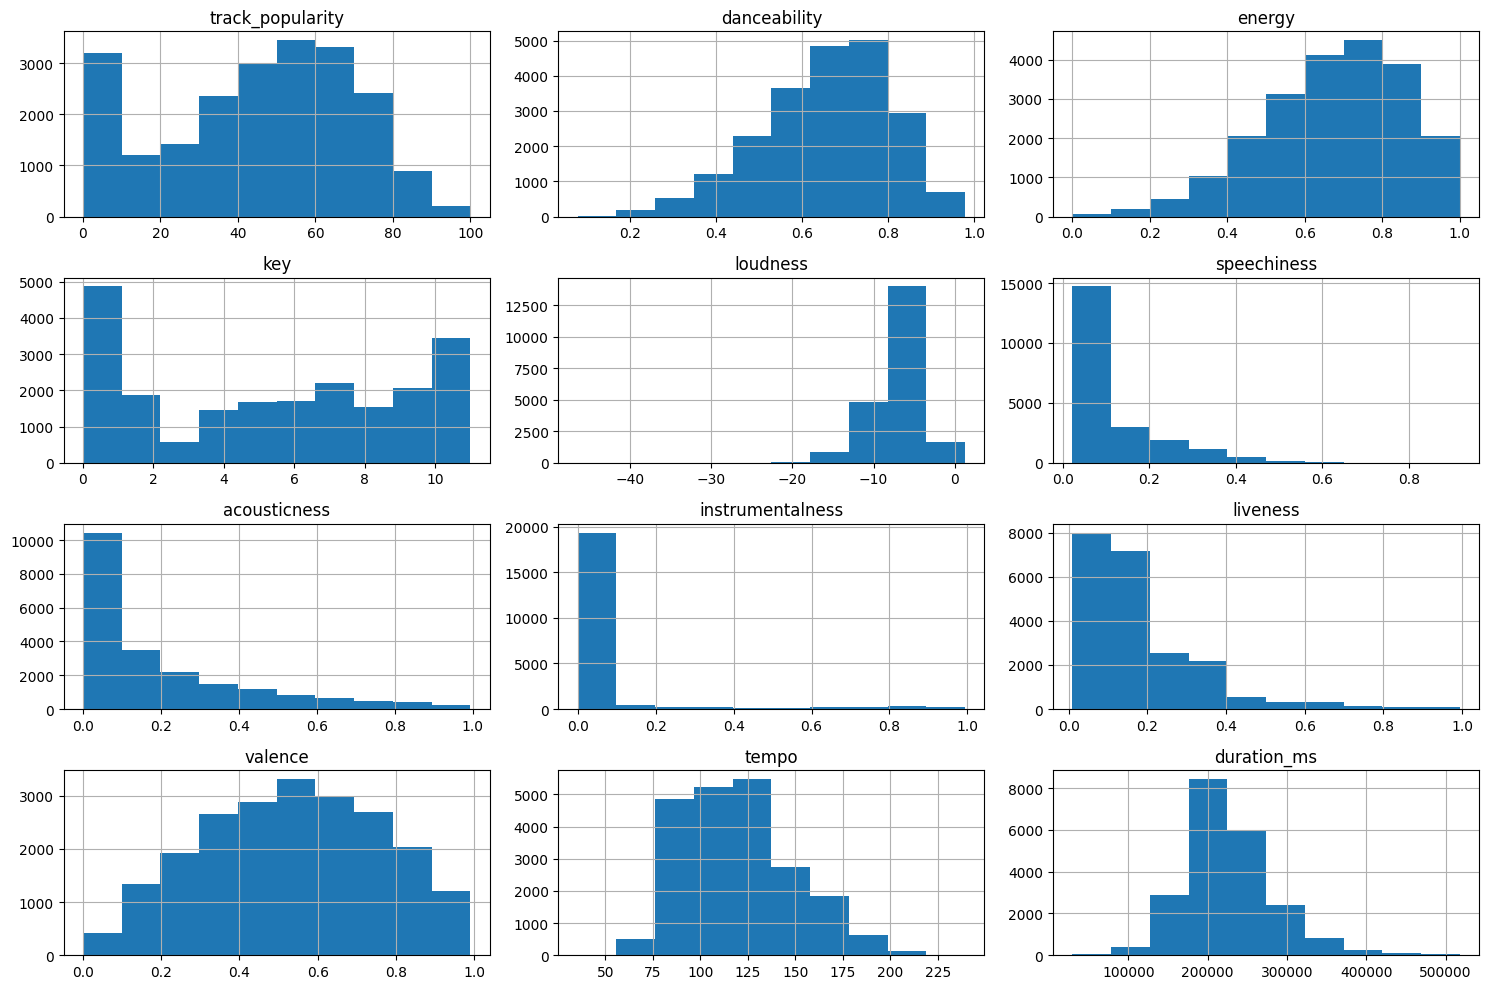

In [ ]:
# Histogrammes des variables numériques

num_cols = [
    "track_popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

train_df[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


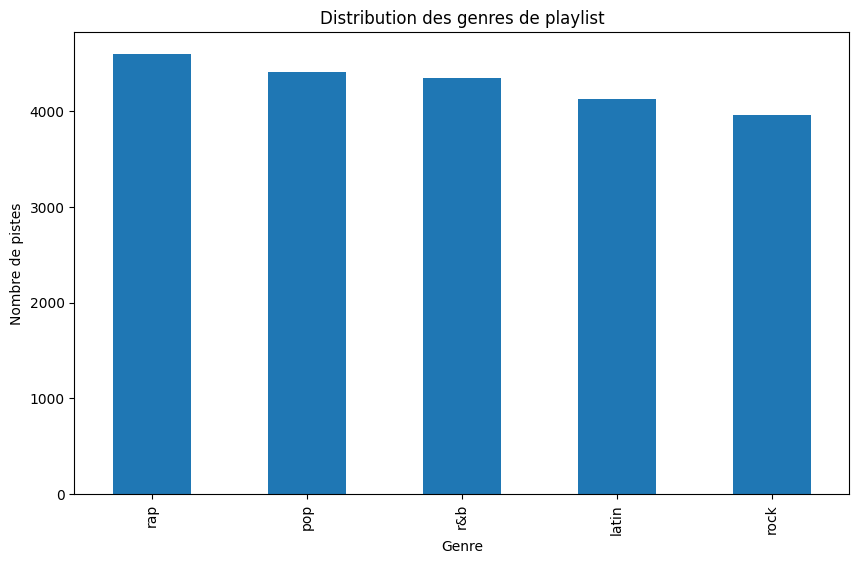

In [ ]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar")
plt.title("Distribution des genres de playlist")
plt.xlabel("Genre")
plt.ylabel("Nombre de pistes")
plt.show()


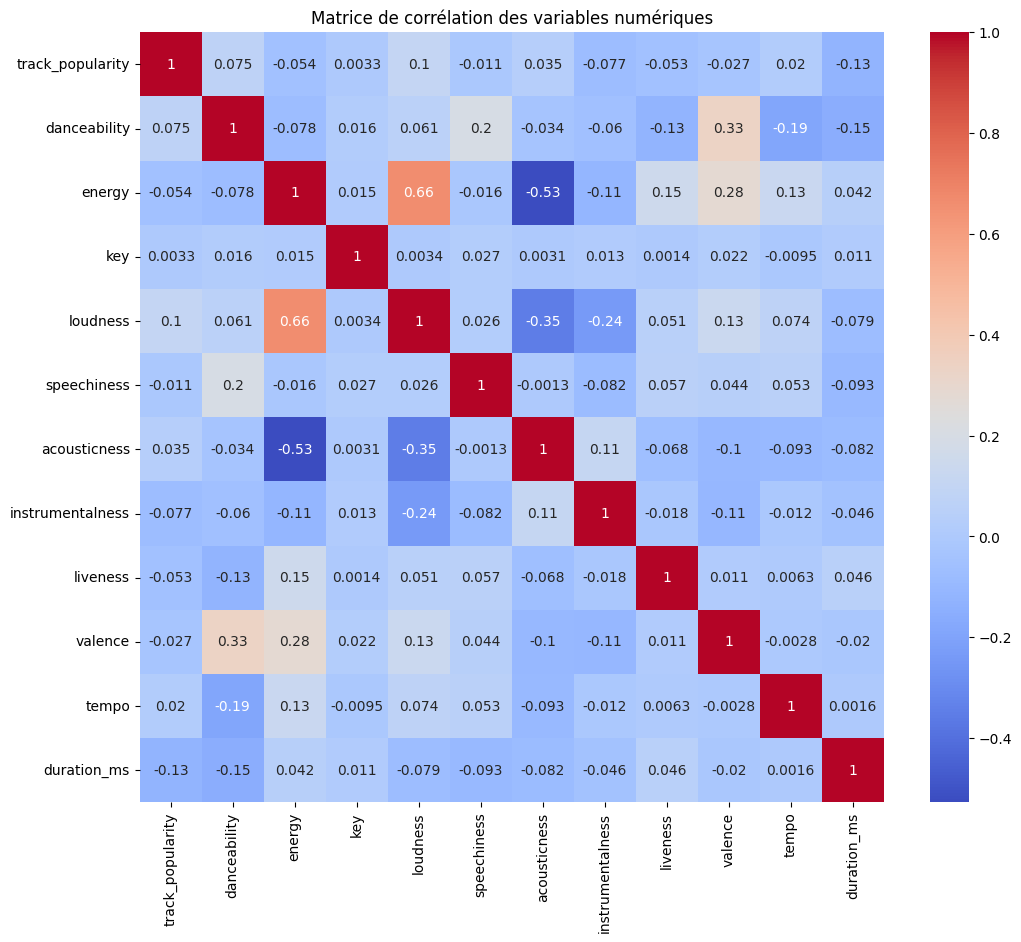

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = train_df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables numériques")
plt.show()


In [ ]:
popularity_by_genre = train_df.groupby("playlist_genre")["track_popularity"].mean()
print(popularity_by_genre)


playlist_genre
latin    46.981320
pop      48.216750
r&b      41.292750
rap      43.180017
rock     41.649836
Name: track_popularity, dtype: float64


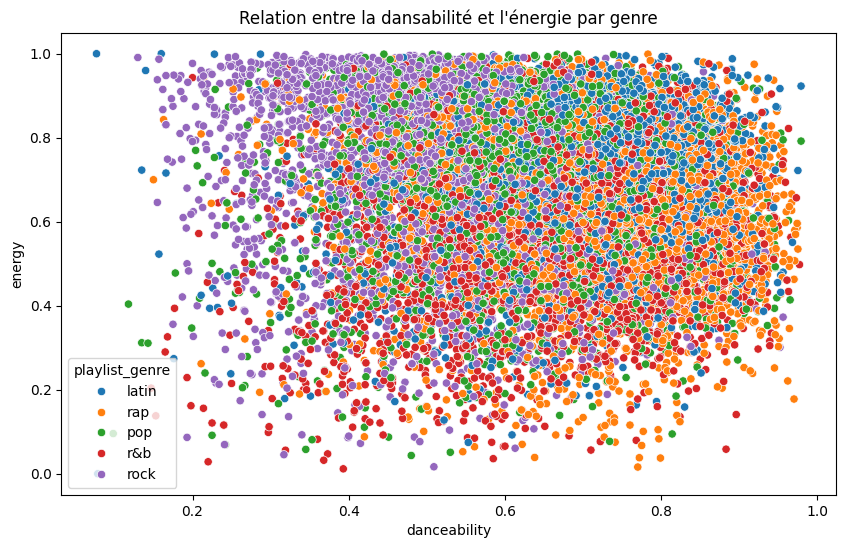

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x="danceability", y="energy", hue="playlist_genre")
plt.title("Relation entre la dansabilité et l'énergie par genre")
plt.show()


## **1.3 :** Application d'algorithmes standards


In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Chargement des données d'entraînement
train_df = pd.read_csv("train.csv", sep="\t")


In [ ]:
# Liste des colonnes quantitatives
quantitative_columns = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

# Sélection des features (X)
X = train_df[quantitative_columns]


In [ ]:
# Variable cible
y = train_df["playlist_genre"]

# Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

# Ajustement sur les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Transformation des données de test
X_test_scaled = scaler.transform(X_test)


### SVM


In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy du SVM : {accuracy_svm:.2f}")


Accuracy du SVM : 0.54


### Arbre de décision


In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy de l'Arbre de Décision : {accuracy_dt:.2f}")


Accuracy de l'Arbre de Décision : 0.44


### K-NN


In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy du KNN : {accuracy_knn:.2f}")


Accuracy du KNN : 0.45


### Random Forest


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy du Random Forest : {accuracy_rf:.2f}")


Accuracy du Random Forest : 0.56


### Regression Logistique


In [ ]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

y_pred_lr = lr_classifier.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy de la Régression Logistique : {accuracy_lr:.2f}")


Accuracy de la Régression Logistique : 0.49


### Resultats


In [ ]:
print("\nRésultats des modèles :\n")
print(f"Accuracy du SVM : {accuracy_svm:.2f}")
print(f"Accuracy de l'Arbre de Décision : {accuracy_dt:.2f}")
print(f"Accuracy du KNN : {accuracy_knn:.2f}")
print(f"Accuracy du Random Forest : {accuracy_rf:.2f}")
print(f"Accuracy de la Régression Logistique : {accuracy_lr:.2f}")



Résultats des modèles :

Accuracy du SVM : 0.54
Accuracy de l'Arbre de Décision : 0.44
Accuracy du KNN : 0.45
Accuracy du Random Forest : 0.56
Accuracy de la Régression Logistique : 0.49


#### **INTERESTING TO LOOK AT BECAUSE RANDOM FOREST IS THE BEST ONE**


In [ ]:
print("\nRapport de classification pour le Random Forest :")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("\nMatrice de confusion pour le Random Forest :")
print(confusion_matrix(y_test, y_pred_rf))



Rapport de classification pour le Random Forest :
              precision    recall  f1-score   support

       latin       0.53      0.45      0.48       849
         pop       0.48      0.46      0.47       915
         r&b       0.48      0.46      0.47       846
         rap       0.61      0.68      0.64       913
        rock       0.67      0.76      0.71       763

    accuracy                           0.56      4286
   macro avg       0.55      0.56      0.56      4286
weighted avg       0.55      0.56      0.55      4286


Matrice de confusion pour le Random Forest :
[[378 192 110 130  39]
 [143 424 130  71 147]
 [100 113 386 178  69]
 [ 79  74 109 618  33]
 [ 18  88  61  13 583]]


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X, y_encoded, cv=5)
print(f"Scores de validation croisée (Random Forest) : {scores}")
print(f"Score moyen : {scores.mean():.2f}")


Scores de validation croisée (Random Forest) : [0.55832944 0.57232851 0.55692954 0.5663944  0.5453909 ]
Score moyen : 0.56


La case suivante prend 4 minutes à elle seule pour tourner, les résultats sont les deux lignes suivantes :

Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Meilleure score : 0.56


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print(f"Meilleurs paramètres : {grid_search.best_params_}")
# print(f"Meilleure score : {grid_search.best_score_:.2f}")


In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importance des caractéristiques :")
for f in range(X.shape[1]):
    print(
        f"{f + 1}. {quantitative_columns[indices[f]]} ({importances[indices[f]]:.4f})"
    )


Importance des caractéristiques :
1. speechiness (0.1326)
2. danceability (0.1267)
3. tempo (0.0981)
4. duration_ms (0.0950)
5. energy (0.0950)
6. acousticness (0.0908)
7. loudness (0.0865)
8. valence (0.0857)
9. liveness (0.0687)
10. instrumentalness (0.0615)
11. key (0.0458)
12. mode (0.0136)
